In [1]:
from FPVsimulation.simulation import FPVsimulation
from FPVsimulation.pvsystem import PVsystem
import pandas as pd
import numpy as np

In [5]:
gross_df = pd.read_csv('/home/mette/master/fpv_energy_yield_norway/data/new_data/gross_area.csv')
gross_df

,lake_id,lake_area,selected_area,latitude,longitude
0,101659,5.859843e+03,5.859843e+03,63.473298,9.573710
1,143542,5.810132e+03,5.810132e+03,63.277645,8.870434
2,142928,3.374364e+03,3.374364e+03,63.498693,8.658613
3,66236,1.916710e+04,1.916710e+04,61.102190,7.924878
4,149735,2.548759e+03,2.548759e+03,61.102717,7.814424
...,...,...,...,...,...
267188,1131,9.327115e+07,9.327115e+07,64.792967,13.583229
267189,1267,7.646861e+07,7.646861e+07,59.169496,8.492432
267190,1268,1.495895e+07,1.495895e+07,59.338664,8.314086
267191,1399,2.748261e+07,2.748261e+07,58.386973,6.585204


In [6]:
social_df = pd.read_csv('/home/mette/master/fpv_energy_yield_norway/data/new_data/social_area.csv')
social_2km_df = pd.read_csv('/home/mette/master/fpv_energy_yield_norway/data/new_data/social_area_2km.csv')


In [10]:

hydro_df = pd.read_csv('/home/mette/master/fpv_energy_yield_norway/data/new_data/hydro_power_systems.csv')

In [ ]:
gross_sample = gross_df.sample(n=1000)
gross_sample['selected_area'] = 1
gross_sample['max_power_MW'] = None

sample_area = gross_sample['selected_area'].sum()
gross_area = gross_df['selected_area'].sum()


sim_gross_sample = FPVsimulation()
sim_gross_sample.register_lakes(gross_sample) 
sample_result = sim_gross_sample.get_annual_energy_yield()
gross_annual_kWh = sample_result['annual_energy_yield_kWh'].sum() * gross_area / sample_area
print(f'Roof production: {gross_annual_kWh/1000} MWh')

In [ ]:

print(f'Roof production: {gross_annual_kWh/1000} MWh')

In [ ]:
social_sample = social_df.sample(n=1000)
social_sample['selected_area'] = 1
social_sample['max_power_MW'] = None

sample_area = social_sample['selected_area'].sum()
social_area = social_df['selected_area'].sum()


sim_social_sample = FPVsimulation()
sim_social_sample.register_lakes(social_sample) 
sample_result = sim_social_sample.get_annual_energy_yield()
social_annual_kWh = sample_result['annual_energy_yield_kWh'].sum() * social_area / sample_area
print(f'Social production: {social_annual_kWh/1000} MWh')

In [16]:
print(f'Roof production: {gross_annual_kWh/1000} MWh')
print(f'Social production: {social_annual_kWh/1000} MWh')

Roof production: 1969183530.2550614 MWh
Social production: 171354220.28194368 MWh


In [ ]:
social_sample_2km = social_2km_df.sample(n=1000)
social_sample_2km['selected_area'] = 1
social_sample_2km['max_power_MW'] = None

sample_area = social_sample_2km['selected_area'].sum()
social_area_2km = social_2km_df['selected_area'].sum()


sim_social_sample_2km = FPVsimulation()
sim_social_sample_2km.register_lakes(social_sample_2km) 
sample_result_2km = sim_social_sample_2km.get_annual_energy_yield()
social_annual_kWh_2km = sample_result_2km['annual_energy_yield_kWh'].sum() * social_area_2km / sample_area
print(f'Social production 2km: {social_annual_kWh_2km/1000} MWh')

In [18]:
print(f'Social production 2km: {social_annual_kWh_2km/1000} MWh')

Social production 2km: 30890338.901919805 MWh


In [22]:
hydro_df

,Unnamed: 0,lake_id,lake_area,selected_area,latitude,longitude,max_power_MW
0,0,Aas,7.360339e+03,1.840085e+03,59.275387,9.559640,1.00
1,1,Adamselv,1.471183e+07,3.677959e+06,70.377997,26.865447,50.00
2,2,Alta,6.749854e+06,1.687464e+06,69.628793,23.780765,150.00
3,3,Andåsfossen,2.492182e+04,6.230456e+03,65.823287,13.273578,2.00
4,4,Angvik,3.296929e+03,8.242323e+02,62.891916,8.070013,1.10
...,...,...,...,...,...,...,...
752,752,Øvre Vinstra,9.830810e+07,2.457703e+07,61.413965,9.242435,140.00
753,753,Øvre Åvella,4.254127e+06,1.063532e+06,60.784079,9.927475,0.43
754,754,Øvrefoss,6.705350e+06,1.676338e+06,68.638311,16.403549,0.95
755,755,Øyadalen,1.114429e+05,2.786073e+04,62.215299,6.309238,2.00


In [11]:
sim_hydro = FPVsimulation()
sim_hydro.register_lakes(hydro_df) 

result_hydro = sim_hydro.get_annual_energy_yield()
result_hydro.to_excel('hydro_result.xlsx')

lake 0 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 1 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 2 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 3 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 4 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 5 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 6 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 7 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 8 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 9 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 10 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 11 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 12 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 13 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 14 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 15 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 16 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 17 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 18 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 19 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 20 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 21 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 22 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 23 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 24 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 25 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 26 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 27 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 28 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 29 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 30 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 31 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 32 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 33 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 34 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 35 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 36 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 37 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 38 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 39 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 40 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 41 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 42 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 43 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 44 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 45 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 46 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 47 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 48 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 49 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 50 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 51 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 52 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 53 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 54 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 55 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 56 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 57 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 58 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 59 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 60 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 61 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 62 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 63 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 64 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 65 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 66 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 67 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 68 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 69 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 70 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 71 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 72 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 73 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 74 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 75 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 76 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 77 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 78 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 79 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 80 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 81 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 82 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 83 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 84 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 85 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 86 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 87 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 88 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 89 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 90 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 91 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 92 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 93 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 94 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 95 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 96 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 97 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 98 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 99 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 100 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 101 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 102 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 103 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 104 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 105 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 106 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 107 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 108 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 109 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 110 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 111 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 112 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 113 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 114 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 115 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 116 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 117 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 118 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 119 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 120 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 121 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 122 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 123 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 124 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 125 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 126 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 127 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 128 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 129 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 130 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 131 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 132 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 133 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 134 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 135 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 136 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 137 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 138 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 139 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 140 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 141 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 142 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 143 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 144 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 145 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 146 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 147 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 148 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 149 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 150 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 151 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 152 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 153 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 154 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 155 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 156 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 157 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 158 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 159 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 160 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 161 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 162 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 163 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 164 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 165 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 166 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 167 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 168 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 169 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 170 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 171 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 172 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 173 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 174 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 175 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 176 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 177 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 178 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 179 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 180 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 181 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 182 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 183 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 184 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 185 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 186 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 187 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 188 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 189 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 190 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 191 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 192 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 193 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 194 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 195 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 196 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 197 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 198 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 199 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 200 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 201 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 202 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 203 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 204 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 205 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 206 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 207 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 208 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 209 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 210 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 211 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 212 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 213 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 214 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 215 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 216 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 217 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 218 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 219 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 220 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 221 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 222 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 223 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 224 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 225 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 226 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 227 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 228 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 229 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 230 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 231 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 232 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 233 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 234 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 235 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 236 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 237 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 238 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 239 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 240 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 241 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 242 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 243 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 244 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 245 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 246 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 247 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 248 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 249 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 250 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 251 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 252 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 253 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 254 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 255 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 256 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 257 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 258 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 259 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 260 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 261 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 262 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 263 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 264 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 265 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 266 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 267 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 268 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 269 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 270 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 271 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 272 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 273 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 274 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 275 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 276 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 277 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 278 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 279 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 280 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 281 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 282 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 283 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 284 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 285 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 286 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 287 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 288 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 289 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 290 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 291 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 292 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 293 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 294 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 295 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 296 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 297 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 298 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 299 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 300 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 301 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 302 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 303 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 304 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 305 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 306 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 307 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 308 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 309 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 310 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 311 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 312 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 313 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 314 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 315 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 316 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 317 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 318 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 319 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 320 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 321 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 322 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 323 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 324 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 325 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 326 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 327 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 328 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 329 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 330 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 331 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 332 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 333 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 334 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 335 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 336 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 337 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 338 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 339 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 340 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 341 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 342 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 343 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 344 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 345 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 346 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 347 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 348 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 349 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 350 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 351 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 352 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 353 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 354 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 355 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 356 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 357 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 358 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 359 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 360 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 361 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 362 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 363 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 364 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 365 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 366 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 367 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 368 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 369 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 370 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 371 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 372 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 373 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 374 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 375 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 376 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 377 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 378 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 379 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 380 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 381 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 382 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 383 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 384 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 385 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 386 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 387 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 388 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 389 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 390 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 391 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 392 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 393 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 394 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 395 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 396 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 397 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 398 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 399 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 400 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 401 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 402 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 403 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 404 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 405 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 406 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 407 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 408 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 409 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 410 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 411 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 412 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 413 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 414 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 415 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 416 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 417 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 418 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 419 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 420 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 421 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 422 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 423 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 424 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 425 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 426 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 427 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 428 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 429 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 430 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 431 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 432 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 433 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 434 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 435 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 436 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 437 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 438 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 439 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 440 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 441 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 442 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 443 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 444 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 445 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 446 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 447 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 448 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 449 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 450 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 451 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 452 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 453 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 454 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 455 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 456 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 457 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 458 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 459 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 460 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 461 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 462 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 463 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 464 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 465 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 466 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 467 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 468 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 469 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 470 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 471 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 472 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 473 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 474 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 475 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 476 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 477 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 478 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 479 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 480 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 481 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 482 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 483 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 484 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 485 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 486 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 487 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 488 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 489 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 490 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 491 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 492 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 493 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 494 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 495 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 496 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 497 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 498 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 499 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 500 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 501 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 502 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 503 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 504 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 505 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 506 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 507 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 508 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 509 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 510 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 511 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 512 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 513 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 514 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 515 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 516 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 517 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 518 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 519 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 520 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 521 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 522 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 523 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 524 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 525 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 526 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 527 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 528 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 529 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 530 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 531 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 532 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 533 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 534 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 535 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 536 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 537 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 538 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 539 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 540 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 541 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 542 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 543 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 544 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 545 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 546 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 547 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 548 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 549 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 550 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 551 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 552 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 553 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 554 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 555 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 556 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 557 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 558 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 559 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 560 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 561 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 562 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 563 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 564 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 565 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 566 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 567 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 568 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 569 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 570 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 571 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 572 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 573 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 574 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 575 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 576 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 577 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 578 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 579 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 580 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 581 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 582 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 583 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 584 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 585 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 586 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 587 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 588 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 589 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 590 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 591 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 592 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 593 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 594 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 595 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 596 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 597 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 598 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 599 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 600 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 601 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 602 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 603 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 604 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 605 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 606 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 607 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 608 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 609 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 610 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 611 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 612 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 613 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 614 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 615 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 616 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 617 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 618 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 619 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 620 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 621 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 622 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 623 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 624 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 625 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 626 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 627 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 628 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 629 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 630 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 631 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 632 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 633 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 634 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 635 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 636 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 637 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 638 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 639 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 640 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 641 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 642 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 643 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 644 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 645 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 646 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 647 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 648 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 649 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 650 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 651 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 652 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 653 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 654 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 655 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 656 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 657 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 658 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 659 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 660 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 661 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 662 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 663 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 664 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 665 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 666 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 667 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 668 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 669 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 670 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 671 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 672 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 673 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 674 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 675 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 676 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 677 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 678 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 679 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 680 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 681 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 682 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 683 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 684 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 685 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 686 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 687 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 688 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 689 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 690 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 691 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 692 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 693 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 694 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 695 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 696 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 697 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 698 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 699 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 700 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 701 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 702 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 703 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 704 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 705 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 706 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 707 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 708 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 709 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 710 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 711 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 712 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 713 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 714 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 715 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 716 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 717 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 718 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 719 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 720 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 721 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 722 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 723 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 724 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 725 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 726 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 727 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 728 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


lake 729 of 730


/home/mette/master/fpv_energy_yield_norway/src/FPVsimulation/pvsystem.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  soiling_loss_gdf['distance'] = soiling_loss_NS3031_gdf['geometry'].distance(center)


In [38]:


hydro_annual_kWh = result_hydro['annual_energy_yield_kWh'].sum() 
print(f'Hydro production 2km: {hydro_annual_kWh/1000} MWh')

Hydro production 2km: 20445527.004653964 MWh


In [ ]:
practical_df = pd.read_csv('../data/new_data/systems.csv')
practical_df['max_power_MW'] = 5*10**6

sim_practical = FPVsimulation()
# sim_practical.set_PVmodel_parameters(params={'max_power_out':5*10**6})
sim_practical.register_lakes(practical_df)

practical_result = sim_practical.get_annual_energy_yield()
practical_result.to_excel('practical.xlsx')

In [42]:
practical_annual_kWh = practical_result['annual_energy_yield_kWh'].sum()
print(f'Roof production: {practical_annual_kWh/1_000} MWh')

Roof production: 5896992.094272671 MWh


/tmp/ipykernel_588/256682137.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f} TWh/year'.format(x/10**9) for x in current_values])


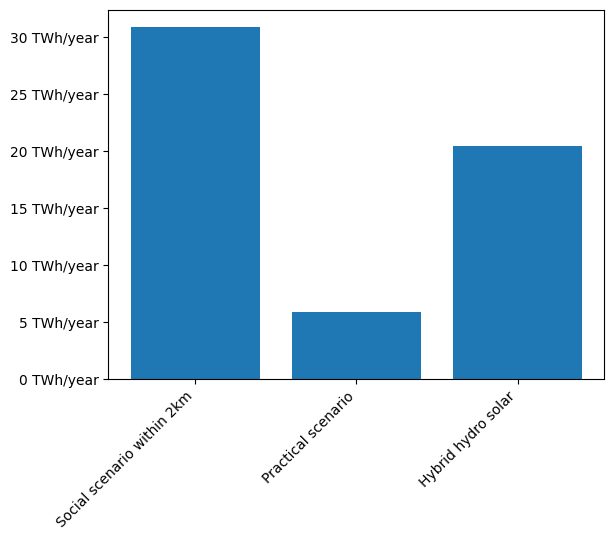

In [72]:
import matplotlib.pyplot as plt

plt.bar(["Social scenario within 2km", "Practical scenario", "Hybrid hydro solar"], [social_annual_kWh_2km, practical_annual_kWh, hydro_annual_kWh])
#plt.yscale("log")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f} TWh/year'.format(x/10**9) for x in current_values])
plt.xticks(rotation=45, ha='right')

plt.savefig("result2.eps", format = 'eps', dpi=300)
plt.show()

/tmp/ipykernel_588/1521114678.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f} TWh/year'.format(x/10**9) for x in current_values])


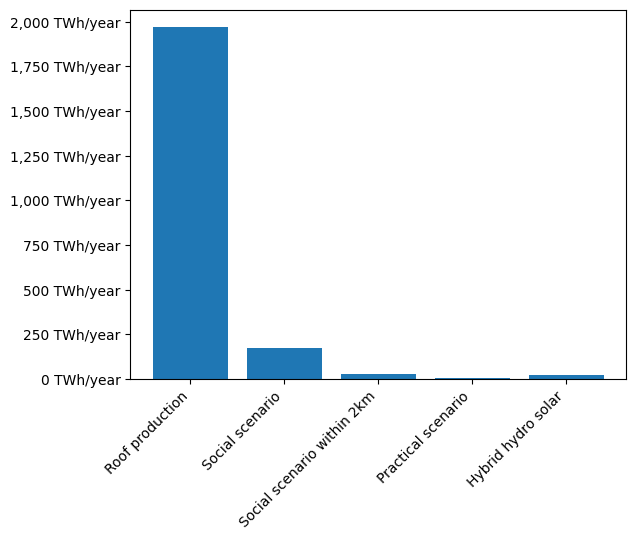

In [70]:
plt.bar(["Roof production", "Social scenario", "Social scenario within 2km", "Practical scenario", "Hybrid hydro solar"], [gross_annual_kWh, social_annual_kWh, social_annual_kWh_2km, practical_annual_kWh, hydro_annual_kWh])
# plt.yscale("log")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f} TWh/year'.format(x/10**9) for x in current_values])
plt.xticks(rotation=45, ha='right')

plt.savefig("result1.svg", format = 'svg', dpi=300)
plt.show()

In [4]:
import geopandas as gpd

price_zones_gdf = gpd.read_file('../data/raw_data/NVEData/Kraftnett/spot_price_zones.geojson')
price_zones_gdf

,OBJECTID,ElSpotOmr,GlobalID,Shape_Length,Shape_Area,geometry
0,1,NO 1,None,1.657761e+06,6.052902e+10,"POLYGON ((11.80905 62.82880, 11.80786 62.82916..."
1,2,NO 2,None,1.256473e+06,6.875969e+10,"POLYGON ((5.74061 60.35170, 5.73955 60.35362, ..."
2,3,NO 3,None,1.773323e+06,1.042199e+11,"POLYGON ((10.87378 65.41986, 10.57806 65.47018..."
3,4,NO 4,None,3.385499e+06,2.032500e+11,"POLYGON ((28.33596 71.29423, 28.31789 71.29557..."
4,5,NO 5,None,1.106762e+06,3.334870e+10,"POLYGON ((7.41477 61.85483, 7.41250 61.85751, ..."


In [5]:
price_zones_result_gdf = price_zones_gdf[['ElSpotOmr', 'geometry']].copy().rename(columns={'ElSpotOmr':'ElSpotArea'})


In [69]:
practical_result = pd.read_excel('practical.xlsx')

practical_result_gdf = gpd.GeoDataFrame(
    practical_result, geometry=gpd.points_from_xy(practical_result['longitude'], practical_result['latitude']), crs="EPSG:4326"
)

price_practical_gdf = practical_result_gdf.sjoin(price_zones_result_gdf[['geometry', 'ElSpotArea']]).drop(columns='index_right')

In [70]:
result_hydro_gdf = gpd.GeoDataFrame(
    result_hydro, geometry=gpd.points_from_xy(result_hydro['longitude'], result_hydro['latitude']), crs="EPSG:4326"
)

price_hydro_gdf = result_hydro_gdf.sjoin(price_zones_result_gdf[['geometry', 'ElSpotArea']]).drop(columns='index_right')

In [71]:
price_hydro_gdf

,lake_id,lake_area,system_area,latitude,longitude,annual_energy_yield_kWh,raddata,geometry,ElSpotArea
0,Aas,7.360339e+03,1.840085e+03,59.275387,9.559640,2.487622e+05,PVGIS-SARAH2,POINT (9.55964 59.27539),NO 2
1,Adamselv,1.471183e+07,3.677959e+06,70.377997,26.865447,4.120584e+07,PVGIS-ERA5,POINT (26.86545 70.37800),NO 4
2,Alta,6.749854e+06,1.687464e+06,69.628793,23.780765,1.182657e+08,PVGIS-ERA5,POINT (23.78077 69.62879),NO 4
3,Andåsfossen,2.492182e+04,6.230456e+03,65.823287,13.273578,6.638217e+05,PVGIS-ERA5,POINT (13.27358 65.82329),NO 4
4,Angvik,3.296929e+03,8.242323e+02,62.891916,8.070013,8.001856e+04,PVGIS-SARAH2,POINT (8.07001 62.89192),NO 3
...,...,...,...,...,...,...,...,...,...
725,Øvre Vinstra,9.830810e+07,2.457703e+07,61.413965,9.242435,1.222826e+08,PVGIS-SARAH2,POINT (9.24244 61.41397),NO 1
726,Øvre Åvella,4.254127e+06,1.063532e+06,60.784079,9.927475,3.988010e+05,PVGIS-SARAH2,POINT (9.92748 60.78408),NO 1
727,Øvrefoss,6.705350e+06,1.676338e+06,68.638311,16.403549,7.564804e+05,PVGIS-ERA5,POINT (16.40355 68.63831),NO 4
728,Øyadalen,1.114429e+05,2.786073e+04,62.215299,6.309238,1.845670e+06,PVGIS-SARAH2,POINT (6.30924 62.21530),NO 3


In [72]:
practical_result_gdf

,Unnamed: 0,lake_id,lake_area,system_area,latitude,longitude,annual_energy_yield_kWh,raddata,geometry
0,0,1073.0,1.050867e+06,105060,59.571100,7.270522,1.171782e+07,PVGIS-SARAH2,POINT (7.27052 59.57110)
1,1,139905.0,9.895230e+03,999,62.487944,11.182115,1.086282e+05,PVGIS-SARAH2,POINT (11.18212 62.48794)
2,2,11363.0,2.128280e+05,2240,58.221232,7.953410,3.326681e+05,PVGIS-SARAH2,POINT (7.95341 58.22123)
3,3,1491.0,9.495696e+05,94878,59.792666,5.484201,1.139838e+07,PVGIS-SARAH2,POINT (5.48420 59.79267)
4,4,286343.0,2.916931e+04,540,69.042584,18.587612,4.741324e+04,PVGIS-ERA5,POINT (18.58761 69.04258)
...,...,...,...,...,...,...,...,...,...
952,952,28367.0,3.008636e+05,30132,61.453934,5.286499,3.542239e+06,PVGIS-SARAH2,POINT (5.28650 61.45393)
953,953,51008.0,8.624564e+04,8658,69.101227,17.153102,7.827513e+05,PVGIS-ERA5,POINT (17.15310 69.10123)
954,954,1603.0,6.535916e+06,30551,61.295470,7.169558,3.331383e+06,PVGIS-SARAH2,POINT (7.16956 61.29547)
955,955,22224.0,5.729866e+05,57348,59.796611,5.167938,7.684540e+06,PVGIS-SARAH2,POINT (5.16794 59.79661)


In [73]:
price_zones_result_gdf.set_index('ElSpotArea', inplace=True)


In [74]:
price_zones_result_gdf['practical_TWh'] = (price_practical_gdf.groupby('ElSpotArea')['annual_energy_yield_kWh'].sum()/10**9).round(2)
price_zones_result_gdf['hydro_TWh'] = (price_hydro_gdf.groupby('ElSpotArea')['annual_energy_yield_kWh'].sum()/10**9).round(2)

In [75]:
price_zones_result_gdf['practical_TWh_str'] =  price_zones_result_gdf['practical_TWh'].apply(lambda x: str(x) + ' TWh')
price_zones_result_gdf['hydro_TWh_str'] = price_zones_result_gdf['hydro_TWh'].apply(lambda x: str(x) + ' TWh')

In [76]:
price_zones_result_gdf

,geometry,practical_TWh,hydro_TWh,practical_TWh_str,hydro_TWh_str
ElSpotArea,,,,,
NO 1,"POLYGON ((11.80905 62.82880, 11.80786 62.82916...",1.08,1.80,1.08 TWh,1.8 TWh
NO 2,"POLYGON ((5.74061 60.35170, 5.73955 60.35362, ...",2.20,7.29,2.2 TWh,7.29 TWh
NO 3,"POLYGON ((10.87378 65.41986, 10.57806 65.47018...",0.93,2.53,0.93 TWh,2.53 TWh
NO 4,"POLYGON ((28.33596 71.29423, 28.31789 71.29557...",1.06,4.03,1.06 TWh,4.03 TWh
NO 5,"POLYGON ((7.41477 61.85483, 7.41250 61.85751, ...",0.62,4.83,0.62 TWh,4.83 TWh


In [77]:
price_zones_result_gdf.to_file('../data/new_data/price_aggregated.geojson')

In [78]:
municipality_gdf = gpd.read_file('../data/raw_data/Basisdata_0000_Norge_25833_Kommuner_GeoJSON.geojson', layer='Kommune')[['kommunenavn', 'kommunenummer', 'geometry']].to_crs('4326')

In [79]:
municipality_gdf

,kommunenavn,kommunenummer,geometry
0,Ibestad,5514,"MULTIPOLYGON (((17.21928 68.76980, 17.21928 68..."
1,Rendalen,3424,"MULTIPOLYGON (((11.71235 61.91803, 11.71168 61..."
2,Rakkestad,3120,"MULTIPOLYGON (((11.20433 59.40319, 11.20460 59..."
3,Nordre Follo,3207,"MULTIPOLYGON (((10.89041 59.81779, 10.89042 59..."
4,Overhalla,5047,"MULTIPOLYGON (((12.07582 64.46951, 12.07576 64..."
...,...,...,...
352,Aarborte - Hattfjelldal,1826,"MULTIPOLYGON (((14.52141 65.61296, 14.52159 65..."
353,Hammerfest - Hámmerfeasta,5603,"MULTIPOLYGON (((23.87676 70.85445, 23.81777 70..."
354,Dielddanuorri - Tjeldsund,5512,"MULTIPOLYGON (((16.57753 68.50230, 16.57779 68..."
355,Porsanger - Porsáŋgu - Porsanki,5622,"MULTIPOLYGON (((26.03309 70.40938, 26.07381 70..."


In [80]:
price_practical_gdf = practical_result_gdf.sjoin(municipality_gdf).drop(columns='index_right')
price_hydro_gdf = result_hydro_gdf.sjoin(municipality_gdf).drop(columns='index_right')

municipality_gdf.set_index('kommunenummer', inplace=True)

municipality_gdf['practical_GWh'] = (price_practical_gdf.groupby('kommunenummer')['annual_energy_yield_kWh'].sum()/10**6).round(2)
municipality_gdf['hydro_GWh'] = (price_hydro_gdf.groupby('kommunenummer')['annual_energy_yield_kWh'].sum()/10**6).round(2)

In [81]:
municipality_gdf

,kommunenavn,geometry,practical_GWh,hydro_GWh
kommunenummer,,,,
5514,Ibestad,"MULTIPOLYGON (((17.21928 68.76980, 17.21928 68...",0.07,9.15
3424,Rendalen,"MULTIPOLYGON (((11.71235 61.91803, 11.71168 61...",NaN,NaN
3120,Rakkestad,"MULTIPOLYGON (((11.20433 59.40319, 11.20460 59...",1.26,NaN
3207,Nordre Follo,"MULTIPOLYGON (((10.89041 59.81779, 10.89042 59...",94.43,NaN
5047,Overhalla,"MULTIPOLYGON (((12.07582 64.46951, 12.07576 64...",NaN,0.69
...,...,...,...,...
1826,Aarborte - Hattfjelldal,"MULTIPOLYGON (((14.52141 65.61296, 14.52159 65...",NaN,0.20
5603,Hammerfest - Hámmerfeasta,"MULTIPOLYGON (((23.87676 70.85445, 23.81777 70...",16.18,12.83
5512,Dielddanuorri - Tjeldsund,"MULTIPOLYGON (((16.57753 68.50230, 16.57779 68...",13.85,21.17


In [82]:
municipality_gdf

,kommunenavn,geometry,practical_GWh,hydro_GWh
kommunenummer,,,,
5514,Ibestad,"MULTIPOLYGON (((17.21928 68.76980, 17.21928 68...",0.07,9.15
3424,Rendalen,"MULTIPOLYGON (((11.71235 61.91803, 11.71168 61...",NaN,NaN
3120,Rakkestad,"MULTIPOLYGON (((11.20433 59.40319, 11.20460 59...",1.26,NaN
3207,Nordre Follo,"MULTIPOLYGON (((10.89041 59.81779, 10.89042 59...",94.43,NaN
5047,Overhalla,"MULTIPOLYGON (((12.07582 64.46951, 12.07576 64...",NaN,0.69
...,...,...,...,...
1826,Aarborte - Hattfjelldal,"MULTIPOLYGON (((14.52141 65.61296, 14.52159 65...",NaN,0.20
5603,Hammerfest - Hámmerfeasta,"MULTIPOLYGON (((23.87676 70.85445, 23.81777 70...",16.18,12.83
5512,Dielddanuorri - Tjeldsund,"MULTIPOLYGON (((16.57753 68.50230, 16.57779 68...",13.85,21.17


In [83]:
municipality_gdf.to_excel('../data/new_data/municipality_aggregated.xlsx')

In [84]:
municipality_gdf.to_file('../data/new_data/municipality_aggregated.kml')

/tmp/ipykernel_21018/3601457935.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  municipality_gdf.to_file('../data/new_data/municipality_aggregated.kml')


In [85]:
municipality_gdf[['geometry']].to_file('../data/new_data/municipality_map.kml')

/tmp/ipykernel_21018/1246994237.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  municipality_gdf[['geometry']].to_file('../data/new_data/municipality_map.kml')


In [86]:
border_gdf = gpd.read_file('../data/raw_data/Basisdata_0000_Norge_25833_NorgesMaritimeGrenser_GML.gml', layer='landareal')

In [87]:
border_gdf.to_crs('4326').to_file('../data/new_data/land_map.kml')
border_gdf.to_crs('4326').to_excel('../data/new_data/land_map.xlsx')

/tmp/ipykernel_21018/3535952597.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  border_gdf.to_crs('4326').to_file('../data/new_data/land_map.kml')


In [89]:
municipality_gdf.sort_values(by='practical_GWh', ascending=False)

,kommunenavn,geometry,practical_GWh,hydro_GWh
kommunenummer,,,,
4207,Flekkefjord,"MULTIPOLYGON (((6.15256 58.02650, 6.15730 58.0...",199.34,1.61
1875,Hábmer - Hamarøy,"MULTIPOLYGON (((15.24576 68.05440, 15.28741 68...",183.00,350.53
4617,Kvinnherad,"MULTIPOLYGON (((5.86009 60.08981, 5.86006 60.0...",151.16,217.98
3909,Larvik,"MULTIPOLYGON (((9.76942 59.37563, 9.76942 59.3...",132.51,7.20
3105,Sarpsborg,"MULTIPOLYGON (((11.26361 59.34966, 11.26356 59...",121.38,NaN
...,...,...,...,...
1557,Gjemnes,"MULTIPOLYGON (((7.75582 62.87101, 7.76021 62.8...",NaN,0.50
3442,Østre Toten,"MULTIPOLYGON (((10.72958 60.73486, 10.73046 60...",NaN,0.02
5540,Gáivuotna - Kåfjord - Kaivuono,"MULTIPOLYGON (((20.96192 69.50479, 20.94889 69...",NaN,71.29


In [90]:
municipality_gdf.sort_values(by='hydro_GWh', ascending=False)

,kommunenavn,geometry,practical_GWh,hydro_GWh
kommunenummer,,,,
1134,Suldal,"MULTIPOLYGON (((6.16558 59.58547, 6.16512 59.5...",111.51,1336.67
4222,Bykle,"MULTIPOLYGON (((6.97856 59.54163, 6.97846 59.5...",77.28,841.99
4036,Vinje,"MULTIPOLYGON (((7.85336 60.11565, 7.85243 60.1...",82.66,675.97
4618,Ullensvang,"MULTIPOLYGON (((6.05338 60.17693, 6.07595 60.1...",66.10,637.08
1837,Meløy,"MULTIPOLYGON (((13.23939 66.77732, 13.21274 66...",13.78,625.65
...,...,...,...,...
5542,Skjervøy,"MULTIPOLYGON (((20.78975 69.90999, 20.94698 69...",NaN,NaN
3209,Ullensaker,"MULTIPOLYGON (((11.09152 60.21504, 11.09148 60...",1.47,NaN
3107,Fredrikstad,"MULTIPOLYGON (((10.68014 59.27517, 10.66495 59...",2.47,NaN
